<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Fresnel-based DOE Stokes analyzer:fotodetector </font>
</div>

- **Fecha**: 2022/03/15
        
- **Autores**: 
    - Javier Alda
    - Luis Miguel Sánchez Brea

   
- **Estado**:  Development

- **Objetivos**: 
    - Generar los fotodetectores de forma independiente


# Importaciones

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import diffractio
import matplotlib as mpl

from diffractio import degrees, mm, plt, sp, um, np, nm
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY

from diffractio.utils_drawing import draw_several_fields

In [10]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector
from py_pol.stokes import Stokes

In [11]:
from py_aocg.stokes_analyzer.stokes_analyzer import Stokes_analyzer, compute_stokes_mask, states_standard

In [12]:
mpl.rcParams['figure.dpi'] = 100 #dpi
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.formatter.useoffset'] = False

In [13]:
np.printoptions(precision=4);
import warnings
warnings.filterwarnings('ignore') 

### Generation of the Polarization State Analyzer with N fresnel zones

In [14]:
num_sectors = 6
focal = 125 * mm
r_shift = 1 * mm

detector_radius = 250*um
detector_size = 500*um

has_draw = True


In [15]:
num_pixels = 256

length = 4*mm
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um


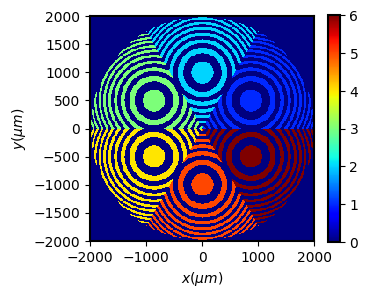

In [16]:
i_stokes_analyzer = Stokes_analyzer(x0, y0, wavelength)
i_stokes_analyzer.stokes_analyzer_lens_indexes(focal, r_shift, num_sectors=6)
i_stokes_analyzer.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)

# Generación del fotodectector

In [34]:
def generate_circular_fotodetectors(self, focal, r_shift,  detector_radius,  num_sectors=6,    has_draw=True):
    """calcula la distribución de intensidad, y parámetros de polarización producida por una lente vectorial

    Arguments:
        focal (float): focal length of lens
        r_shift (float): distance between the center of the mask and the center of the FZP lens
        num_sectors (int): Numbers of sectors in the lens
        has_draw (bool): If True drasw figures

    """

    x0 = self.x
    y0 = self.y
    wavelength = self.wavelength

    theta = np.linspace(0,2*np.pi, num=num_sectors, endpoint=False) 
    x_center_detectors = r_shift * np.cos(theta)
    y_center_detectors = r_shift * np.sin(theta)

    # radio maximo del detector
    #rmax_det = r_shift * np.sin(360 * degrees / (2 * num_sectors))
    #r_det = 0.82 * rmax_det  # reduce el tamaño del detector

    detector = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    detector_index = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    for i in range(num_sectors):
        detector.circle(r0=(x_center_detectors[i], y_center_detectors[i]), radius=detector_radius, angle=0 * degrees)
        detector_index.u =  detector_index.u + (i+1) *detector.u

    self.u = detector_index.u
    return self

In [38]:
detector_1 = i_stokes_analyzer.duplicate(clear = True)
detector_1= generate_circular_fotodetectors(detector_1, focal, r_shift,  detector_radius,  num_sectors=6,    has_draw=True)
detector_1.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)


In [45]:
def generate_fotodetector_square(self, focal, r_shift, num_sectors=6, detector_size = 250*um,  has_draw=True):
    """calcula la distribución de intensidad, y parámetros de polarización producida por una lente vectorial

    Arguments:
        focal (float): focal length of lens
        r_shift (float): distance between the center of the mask and the center of the FZP lens
        num_sectors (int): Numbers of sectors in the lens
        has_draw (bool): If True drasw figures

    """

    x0 = self.x
    y0 = self.y
    wavelength = self.wavelength

    theta = np.linspace(0,2*np.pi, num=num_sectors, endpoint=False) 
    x_center_detectors = r_shift * np.cos(theta)
    y_center_detectors = r_shift * np.sin(theta)

    # radio maximo del detector
    #rmax_det = r_shift * np.sin(360 * degrees / (2 * num_sectors))
    #r_det = 0.82 * rmax_det  # reduce el tamaño del detector

    detector = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    detector_index = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    for i in range(num_sectors):
        detector.square(r0=(x_center_detectors[i], y_center_detectors[i]), size=detector_size, angle=0 * degrees)
        detector_index.u =  detector_index.u + (i+1) *detector.u
        
    self.u = detector_index.u
    return self
    
    

In [47]:
detector_1 = i_stokes_analyzer.duplicate(clear = True)
detector_1= generate_fotodetector_square(detector_1, focal, r_shift,  num_sectors=6,   detector_size = 500*um,   has_draw=True)
detector_1.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)

In [58]:
def generate_fotodetectors_slices(self, focal, r_shift, num_sectors=6, fill_sectors=0.5, radius_size = 2*mm,  has_draw=True):
    """calcula la distribución de intensidad, y parámetros de polarización producida por una lente vectorial

    Arguments:
        focal (float): focal length of lens
        r_shift (float): distance between the center of the mask and the center of the FZP lens
        num_sectors (int): Numbers of sectors in the lens
        has_draw (bool): If True drasw figures

    """
    

    x0 = self.x
    y0 = self.y
    wavelength = i_stokes_analyzer.wavelength

    R = np.sqrt((self.X)**2 + (self.Y)**2)
    Theta = np.arctan2(-self.Y, -self.X)    + np.pi
    
    angle_size_maximum = 2*np.pi/num_sectors
    angle_center = np.linspace(0,2*np.pi, num=num_sectors, endpoint=False) 
    # radio maximo del detector
    #rmax_det = r_shift * np.sin(360 * degrees / (2 * num_sectors))
    #r_det = 0.82 * rmax_det  # reduce el tamaño del detector

    detector = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    detector_index = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
    for i in range(num_sectors):
        theta_min = angle_center[i] - angle_size_maximum/2*fill_sectors
        theta_max = angle_center[i] + angle_size_maximum/2*fill_sectors
        if theta_min < 0:
            theta_min = theta_min + 2*np.pi
        if theta_max < 0:
            theta_max = theta_max + 2*np.pi
        
        if theta_min < theta_max:
            i_pasa = np.bitwise_and(Theta > theta_min, Theta < theta_max)
        else:
            i_pasa = 1-np.bitwise_and(Theta > theta_max, Theta < theta_min)
        detector.u[i_pasa] = 1
        detector_index.u =  detector_index.u + (i+1) * i_pasa
        
    detector_index.u[R<r_shift-radius_size/2]=0
    detector_index.u[R>r_shift+radius_size/2]=0
    detector_index.pupil()

    self.u = detector_index.u
    return self

In [59]:
    
detector_1 = i_stokes_analyzer.duplicate(clear = True)
detector_1 = generate_fotodetectors_slices(detector_1, focal, r_shift, num_sectors=6, fill_sectors=0.5, radius_size = 500*um,  has_draw=True)
detector_1.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)